<a href="https://colab.research.google.com/github/AyusheeMittal/YOLO-V3/blob/main/yolov3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/AyusheeMittal/YOLO-V3.git

Cloning into 'YOLO-V3'...
remote: Enumerating objects: 125, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 1405 (delta 71), reused 0 (delta 0), pack-reused 1280
Receiving objects: 100% (1405/1405), 80.22 MiB | 48.64 MiB/s, done.
Resolving deltas: 100% (130/130), done.


In [2]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 

print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.7.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
%ls

gdrive/  sample_data/  YOLO-V3/


In [5]:
%cd YOLO-V3/

/content/YOLO-V3


In [6]:
mkdir weights

In [7]:
!cp ../gdrive/'My Drive'/'eva5'/'yolov3-spp-ultralytics.pt' weights/

In [8]:
# Copy and add custom dataset

!cp ../gdrive/'My Drive'/'eva5'/'ass15A'/YoloV3_Dataset.zip .
!unzip YoloV3_Dataset.zip
!ls YoloV3_Dataset

Streaming output truncated to the last 5000 lines.
  inflating: YoloV3_Dataset/Labels/Mimg_108.txt  
  inflating: __MACOSX/YoloV3_Dataset/Labels/._Mimg_108.txt  
  inflating: YoloV3_Dataset/Labels/z037 .txt  
  inflating: __MACOSX/YoloV3_Dataset/Labels/._z037 .txt  
  inflating: YoloV3_Dataset/Labels/images (52).txt  
  inflating: __MACOSX/YoloV3_Dataset/Labels/._images (52).txt  
  inflating: YoloV3_Dataset/Labels/Bimg_5.txt  
  inflating: __MACOSX/YoloV3_Dataset/Labels/._Bimg_5.txt  
  inflating: YoloV3_Dataset/Labels/images (1).txt  
  inflating: __MACOSX/YoloV3_Dataset/Labels/._images (1).txt  
  inflating: YoloV3_Dataset/Labels/Himage_085.txt  
  inflating: __MACOSX/YoloV3_Dataset/Labels/._Himage_085.txt  
  inflating: YoloV3_Dataset/Labels/C27.txt  
  inflating: __MACOSX/YoloV3_Dataset/Labels/._C27.txt  
  inflating: YoloV3_Dataset/Labels/SImage_105.txt  
  inflating: __MACOSX/YoloV3_Dataset/Labels/._SImage_105.txt  
  inflating: YoloV3_Dataset/Labels/photo-of-smiling-bearded-con

In [9]:
ls

cfg/       __MACOSX/  test.py   weights/            yolov3.ipynb
data/      models.py  train.py  YoloV3_Dataset/
detect.py  README.md  utils/    YoloV3_Dataset.zip


In [10]:
%cd data/

/content/YOLO-V3/data


In [11]:
mkdir customdata/

In [12]:
%cd customdata/

/content/YOLO-V3/data/customdata


In [13]:
mkdir images/

In [14]:
mkdir labels/

In [15]:
mkdir testimages/

In [16]:
cd ../..

/content/YOLO-V3


In [17]:
ls

cfg/       __MACOSX/  test.py   weights/            yolov3.ipynb
data/      models.py  train.py  YoloV3_Dataset/
detect.py  README.md  utils/    YoloV3_Dataset.zip


In [18]:
!cp YoloV3_Dataset/Images/* data/customdata/images/
!cp YoloV3_Dataset/Labels/* data/customdata/labels/
!cp ../gdrive/'My Drive'/'eva5'/a.jpg data/customdata/testimages/
!cp ../gdrive/'My Drive'/'eva5'/b.jpg data/customdata/testimages/

In [19]:
# Copy custom config files
!cp ../gdrive/'My Drive'/'eva5'/custom.names data/customdata/
!cp ../gdrive/'My Drive'/'eva5'/custom.data data/customdata/
!cp ../gdrive/'My Drive'/'eva5'/custom.txt data/customdata/
!cp ../gdrive/'My Drive'/'eva5'/custom_train.txt data/customdata/
!cp ../gdrive/'My Drive'/'eva5'/custom_test.txt data/customdata/
!cp ../gdrive/'My Drive'/'eva5'/custom.shapes data/customdata/
!cp ../gdrive/'My Drive'/'eva5'/train.shapes data/customdata/
!cp ../gdrive/'My Drive'/'eva5'/test.shapes data/customdata/

In [20]:
!python train.py --data data/customdata/custom.data --batch 16 --img-size 256 --cache --epochs 20

Namespace(accumulate=4, adam=False, batch_size=16, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=20, evolve=False, img_size=[256], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2021-01-21 07:16:59.421570: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (3025 found, 131 missing, 38 empty, 0 duplicate, for 3194 images): 100% 3194/3194 [00:00<00:00, 7971.28it/s]
Caching images (0.4GB): 100% 3194/3194 [00:16<00:00, 189.49it/s]
Reading image shapes: 100% 317/317 [00:00<00:00, 4535.30it/s]
Caching labels (296 found, 1

In [21]:
!python train.py --data data/customdata/custom.data --batch 16 --cache --epochs 20 --weights weights/best.pt

Namespace(accumulate=4, adam=False, batch_size=16, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=20, evolve=False, img_size=[512], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2021-01-21 07:48:38.715807: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (3025 found, 131 missing, 38 empty, 0 duplicate, for 3194 images): 100% 3194/3194 [00:01<00:00, 2232.21it/s]
Caching images (1.8GB): 100% 3194/3194 [00:20<00:00, 155.74it/s]
Caching labels (296 found, 14 missing, 7 empty, 0 duplicate, for 317 images): 100% 317/317 [00:00<00:00, 356

In [22]:
!python detect.py --conf-thres 0.1 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/testimages', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
image 1/2 data/customdata/testimages/a.jpg: 384x512 1 hardhats, 1 masks, Done. (0.037s)
image 2/2 data/customdata/testimages/b.jpg: 384x512 1 hardhats, Done. (0.037s)
Results saved to /content/YOLO-V3/out_out
Done. (0.193s)


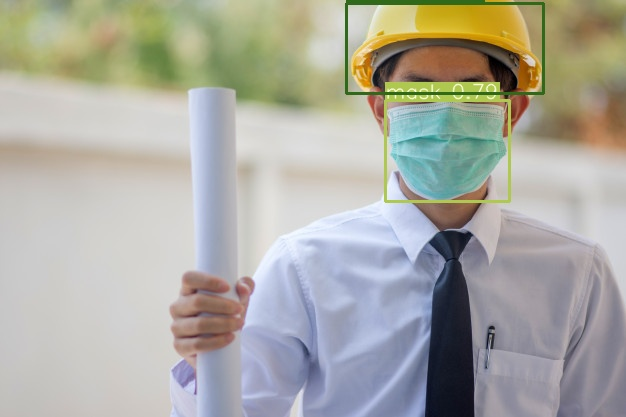

In [26]:
Image(filename='out_out/a.jpg', width=600)

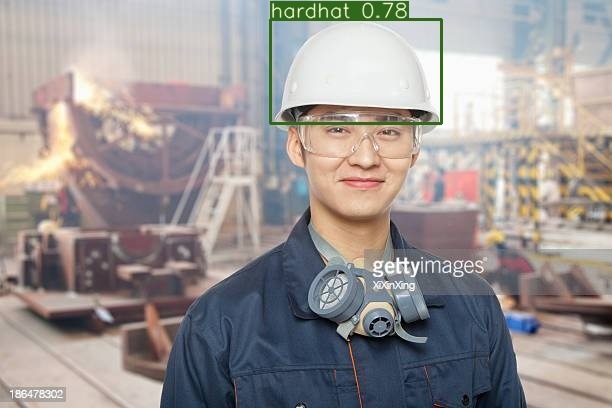

In [24]:
Image(filename='out_out/b.jpg', width=600)